# Desafio Word Cloud e n-grams

Gerar uma imagem usando o https://www.jasondavies.com/wordcloud/ usando o texto respondido sobre a expectativa do curso. Usar conceitos de n-grams para que a imagem gerada simplesmente fazendo a cola do texto no wordcloud (visualizada abaixo), fique mais representativa.

Depois da imagem, está o texto das expectativas, já em um único string para ser processado. Processe o texto e coloque ele no wordcloud e coloque a imagem resultante no final do notebook. É só fazer um "Colar" numa célula texto do notebook.

Boa sorte.

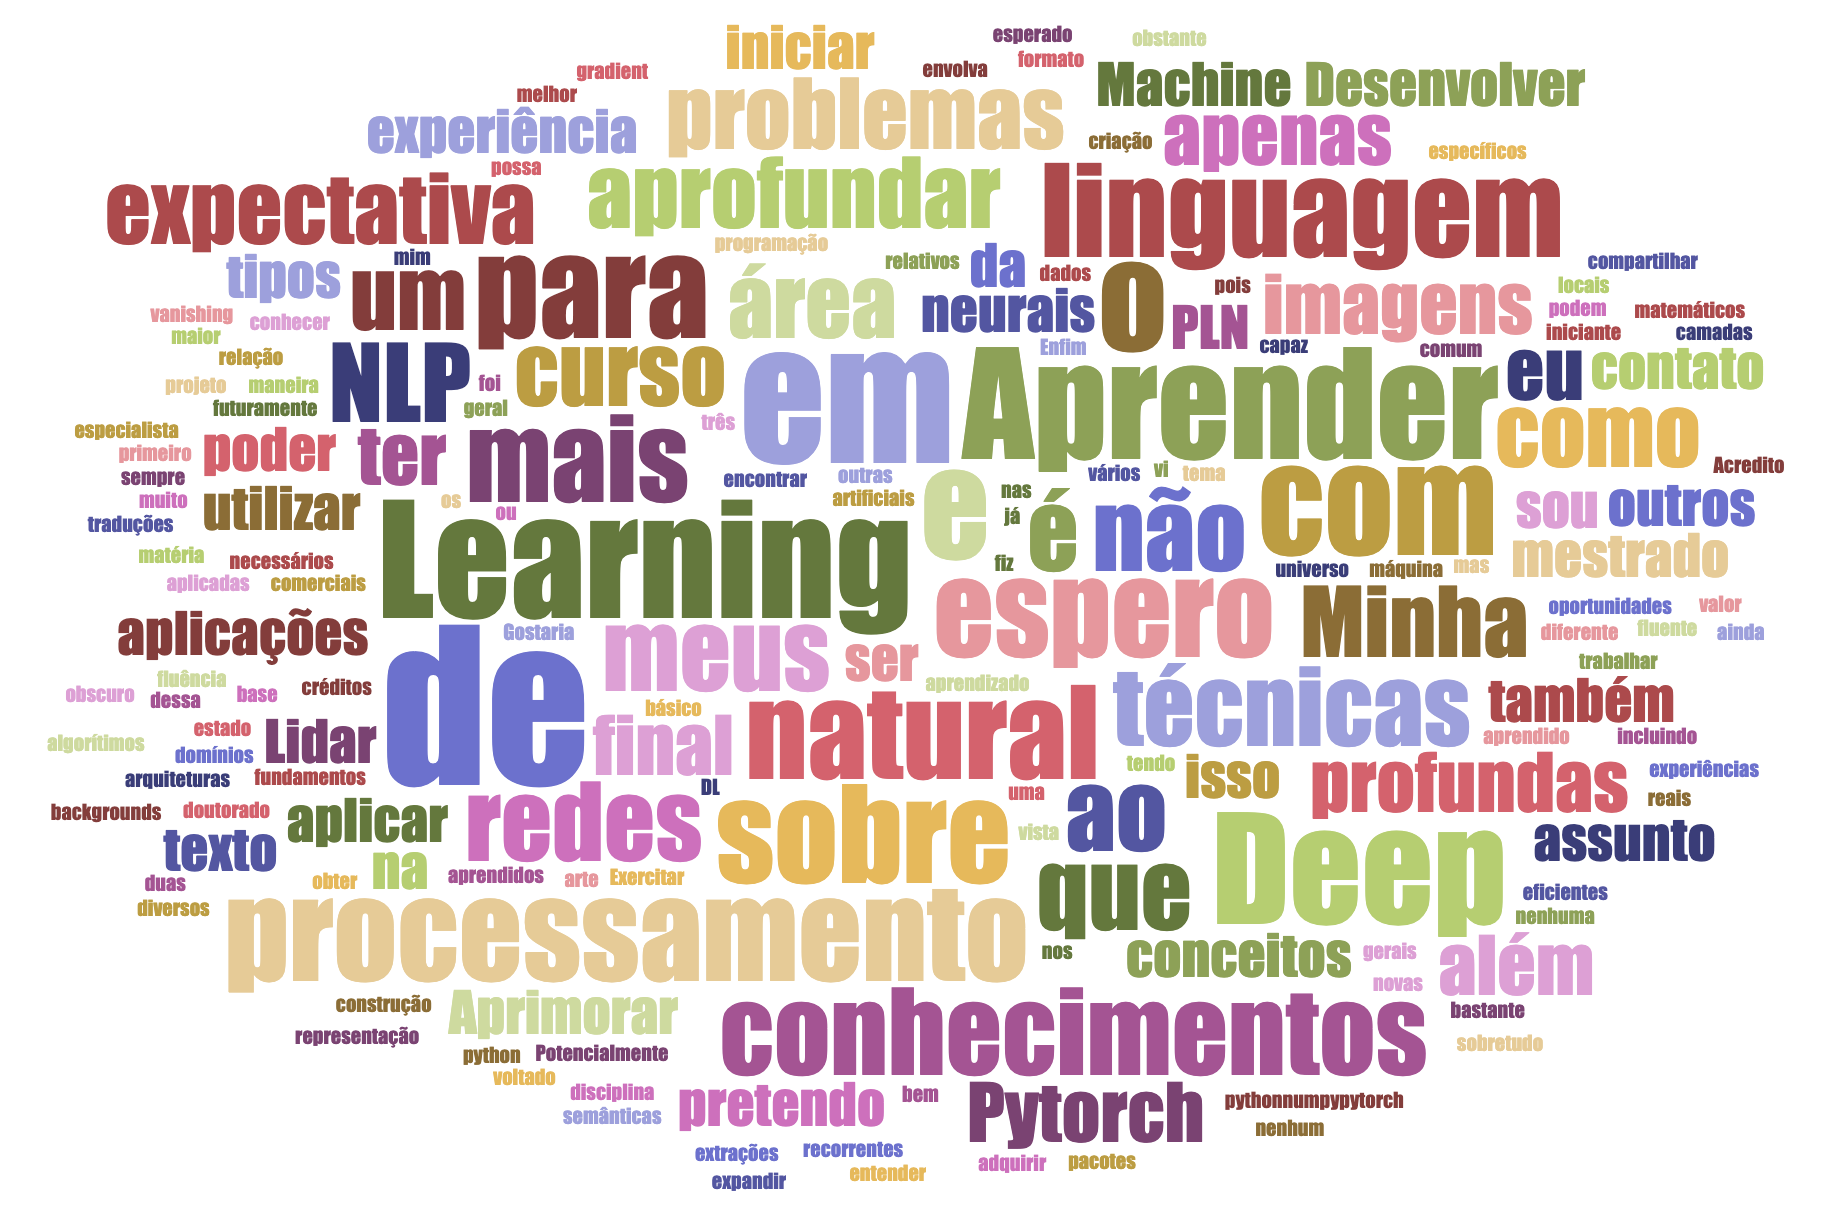

In [0]:
respostas = '''Aprender mais sobre aprendizado de máquina e redes neurais artificiais profundas. Exercitar programação em python/numpy/pytorch. Aprender fundamentos de processamento de linguagem natural.
Aprofundar meus conhecimentos de Deep Learning, em uma área diferente da minha experiência em imagens. Potencialmente aplicar conceitos aprendidos na disciplina em processamento de imagens.
Espero aprimorar meus conhecimentos em Deep Learning, conhecer o universo de NLP e aprender a utilizar o Pytorch. Com isso, espero encontrar oportunidades para iniciar o mestrado.
Gostaria de me aprofundar nos conhecimentos relativos ao processamento de linguagem natural tendo em vista a criação de aplicações comerciais. Também espero obter os créditos necessários para o doutorado.
Espero ao final do curso ter aprendido bastante sobre processamento de linguagem natural, bem como conceitos base gerais de deep learning. Espero poder ser capaz de lidar com problemas de deep learning em vários domínios (não apenas PLN). Enfim, pretendo iniciar um mestrado na área e futuramente trabalhar com isso.
Espero aprender a utilizar o Pytorch de maneira fluente além de aprender mais sobre a construção de redes neurais profundas. Com relação ao Processamento de Linguagem Natural, eu pretendo aprender o básico sobre o tema, pois sou iniciante no assunto.
Aprender técnicas de Deep Learning estado da arte para a representação de um texto
Aprofundar meus conhecimentos em Deep Learning e aprender sobre Processamento de Linguagem Natural, incluindo técnicas que podem ser aplicadas a outros tipos de problemas.
Minha expectativa é a de aprender arquiteturas eficientes de redes recorrentes, e outras técnicas para processamento de linguagem natural. Além de me aprofundar nas técnicas de Deep Learning em geral
Aprender mais sobre a área de Machine Learning. Desenvolver maior fluência em python e em pacotes específicos (Pytorch). Desenvolver, ao final do curso, um projeto que envolva dados em formato de texto.
O valor esperado dessa experiência é adquirir novas técnicas de DL e NLP.
Aprimorar meus conhecimentos em Deep Learning para NLP, além de compartilhar experiências.
Aprender mais sobre NLP e Deep Learning.
Como ainda não fiz nenhuma matéria de Deep Learning, apenas de Machine Learning, minha expectativa é de poder aplicar algorítimos em problemas reais em diversos tipos de aplicações, não apenas voltado para área de PLN, mas também para processamento de imagens.
Acredito que a melhor expectativa que eu possa ter é um primeiro contato com linguagem natural, que sempre foi muito obscuro para mim. Lidar com traduções, com extrações semânticas, como eu já vi em outros locais. Não obstante, não sou nenhum especialista em redes profundas e espero entender sobre o assunto ao final do curso, sobretudo backgrounds matemáticos, como gradient vanishing, comum em redes com mais de duas ou três camadas.
Minha expectativa com o curso é expandir meus conhecimentos em Deep Learning e ter mais contato com problemas de NLP.
'''


## Visualizando o tamanho do string, os primeiros 40 caracteres e os últimos 40 caracteres.

In [2]:
len(respostas), respostas[:40], respostas[-40:]

(3012,
 'Aprender mais sobre aprendizado de máqui',
 ' ter mais contato com problemas de NLP.\n')

Faça seu programa para processar o string e gerar um novo string que será colocado manualmente no word cloud.

Coloque a imagem resultante numa célula texto.

### importing libraries

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from collections import Counter
from nltk.util import ngrams 

### stop words

In [4]:
# get Portuguese stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
# print first 15 stop words
print(stopwords[:15])
# print number of stopwords
len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os']


204

### vectorizer

In [0]:
# corpus = [respostas]
# vectorizer = CountVectorizer(
#     stop_words = nltk.corpus.stopwords.words('portuguese'),
#     ngram_range = (1,3),
# )
# X = vectorizer.fit_transform(corpus)
# vocab2 = vectorizer.get_feature_names()

### pre-processing

In [6]:
# convert to lowercase
vocab_pp = respostas.lower()
# match word characters [a-zA-Z0-9_]
vocab_pp = re.sub("[^\w]", " ",  vocab_pp)
# split 'respostas' in words
vocab_pp = vocab_pp.split()
print('number of words before removing stopwords: ', len(vocab_pp))

number of words before removing stopwords:  459


In [7]:
# remove stopwords
vocab = []
for word in vocab_pp:
    if word not in stopwords:
        vocab.append(word)
print('number of words after removing stopwords: ', len(vocab))

number of words after removing stopwords:  284


### output text

In [0]:
answer = ''

### trigrams

In [9]:
# get only the 2 most common trigrams
trigram = Counter(ngrams(vocab, 3)).most_common()[:2]
expression = []
remove_list = []
for ngram in trigram:
    expression_list = []
    for word in ngram[0]:
        expression_list.append(word)
        remove_list.append(word)
    # joing words with '-' so they are represented together
    #answer += ngram[1]*("-".join(expression_list)+" ")
    #answer += ngram[1]*("_".join(expression_list)+" ")
    print('expression: "', " ".join(expression_list), '"\noccurrency: ', ngram[1], '\n', sep='')
    ########################################################
    # https://www.jasondavies.com/wordcloud/
    # website not permitting three words :/
    # so I change these expressions manualy to a equivalent with less characters
    ########################################################
########################################################
answer += 6*"nlp "           # replacing --> "processamento linguagem natural"
answer += 5*"deeplearning "  # replacing --> "conhecimentos deep learning"
########################################################

expression: "processamento linguagem natural"
occurrency: 6

expression: "conhecimentos deep learning"
occurrency: 5



In [0]:
# function to remove text used from vocab
def remove_from_vocab_3gram(ngram, vocab, list):
    idx = []
    for i in range(len(vocab) - ngram):
        for j in range(int(len(list)/ngram)):
            if(vocab[i] == list[ngram*j] and vocab[i+1] == list[ngram*j+1] and vocab[i+2] == list[ngram*j+2]):
                idx.append(i), idx.append(i+1), idx.append(i+2)
    idx.sort(reverse=True)
    for index in idx:
        vocab.pop(index)
    return vocab

In [11]:
print('size of vocab before trigrams: ', len(vocab))
vocab = remove_from_vocab_3gram(3, vocab, remove_list)
print('size of vocab after trigrams: ', len(vocab))

size of vocab before trigrams:  284
size of vocab after trigrams:  251


### bigrams

In [12]:
# get only the 5 most common bigrams
bigram = Counter(ngrams(vocab, 2)).most_common()[:5]
expression = []
remove_list = []
for ngram in bigram:
    expression_list = []
    for word in ngram[0]:
        expression_list.append(word)
        remove_list.append(word)
    # joing words with '-' so they are represented together
    answer += ngram[1]*("-".join(expression_list)+" ")
    print('expression: "', " ".join(expression_list), '"\noccurrency: ', ngram[1], '\n', sep='')

expression: "deep learning"
occurrency: 6

expression: "aprender sobre"
occurrency: 5

expression: "final curso"
occurrency: 3

expression: "redes neurais"
occurrency: 2

expression: "processamento imagens"
occurrency: 2



In [0]:
# function to remove text used from vocab
def remove_from_vocab_2gram(ngram, vocab, list):
    idx = []
    for i in range(len(vocab) - ngram):
        for j in range(int(len(list)/ngram)):
            if(vocab[i] == list[ngram*j] and vocab[i+1] == list[ngram*j+1]):
                idx.append(i), idx.append(i+1)
    idx.sort(reverse=True)
    for index in idx:
        vocab.pop(index)
    return vocab

In [14]:
print('size of vocab before trigrams: ', len(vocab))
vocab = remove_from_vocab_2gram(2, vocab, remove_list)
print('size of vocab after trigrams: ', len(vocab))

size of vocab before trigrams:  251
size of vocab after trigrams:  215


### unigrams

In [15]:
# get only the 5 most common bigrams
unigram = Counter(ngrams(vocab, 1)).most_common()[:100]
expression = []
remove_list = []
for ngram in unigram:
    expression_list = []
    for word in ngram[0]:
        expression_list.append(word)
        remove_list.append(word)
    # joing words with '-' so they are represented together
    answer += ngram[1]*("-".join(expression_list)+" ")
    print(ngram[1], ': "', " ".join(expression_list), '"', sep='')

7: "espero"
6: "aprender"
5: "nlp"
5: "técnicas"
4: "pytorch"
4: "aprofundar"
4: "área"
4: "problemas"
4: "expectativa"
3: "profundas"
3: "ter"
3: "sobre"
3: "apenas"
3: "além"
3: "redes"
2: "python"
2: "experiência"
2: "aplicar"
2: "conceitos"
2: "aprimorar"
2: "utilizar"
2: "iniciar"
2: "mestrado"
2: "aplicações"
2: "poder"
2: "ser"
2: "lidar"
2: "pln"
2: "pretendo"
2: "assunto"
2: "texto"
2: "outros"
2: "tipos"
2: "machine"
2: "learning"
2: "desenvolver"
2: "contato"
1: "aprendizado"
1: "máquina"
1: "artificiais"
1: "exercitar"
1: "programação"
1: "numpy"
1: "fundamentos"
1: "diferente"
1: "imagens"
1: "potencialmente"
1: "aprendidos"
1: "disciplina"
1: "conhecer"
1: "universo"
1: "encontrar"
1: "oportunidades"
1: "gostaria"
1: "conhecimentos"
1: "relativos"
1: "tendo"
1: "vista"
1: "criação"
1: "comerciais"
1: "obter"
1: "créditos"
1: "necessários"
1: "doutorado"
1: "aprendido"
1: "bastante"
1: "bem"
1: "base"
1: "gerais"
1: "capaz"
1: "vários"
1: "domínios"
1: "enfim"
1: "futurame

In [16]:
answer

'nlp nlp nlp nlp nlp nlp deeplearning deeplearning deeplearning deeplearning deeplearning deep-learning deep-learning deep-learning deep-learning deep-learning deep-learning aprender-sobre aprender-sobre aprender-sobre aprender-sobre aprender-sobre final-curso final-curso final-curso redes-neurais redes-neurais processamento-imagens processamento-imagens espero espero espero espero espero espero espero aprender aprender aprender aprender aprender aprender nlp nlp nlp nlp nlp técnicas técnicas técnicas técnicas técnicas pytorch pytorch pytorch pytorch aprofundar aprofundar aprofundar aprofundar área área área área problemas problemas problemas problemas expectativa expectativa expectativa expectativa profundas profundas profundas ter ter ter sobre sobre sobre apenas apenas apenas além além além redes redes redes python python experiência experiência aplicar aplicar conceitos conceitos aprimorar aprimorar utilizar utilizar iniciar iniciar mestrado mestrado aplicações aplicações poder pod

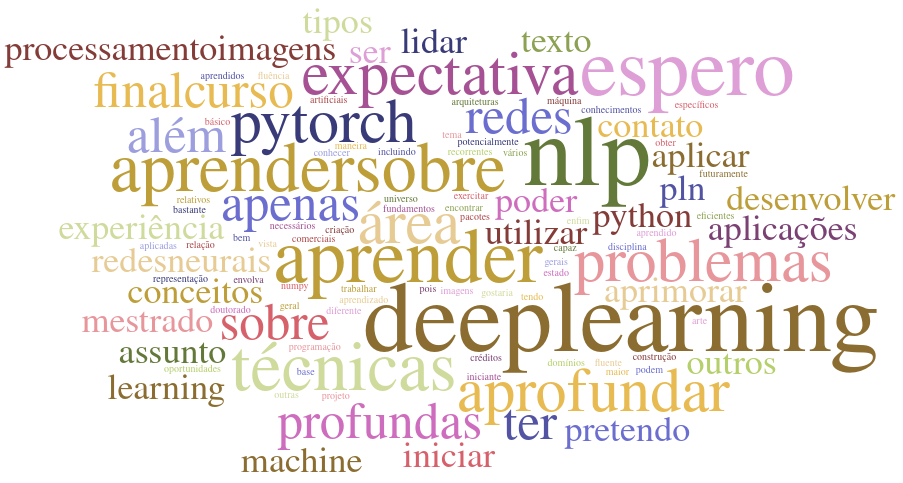